In [3]:
from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
from moviepy.editor import *
import pygame
import cv2

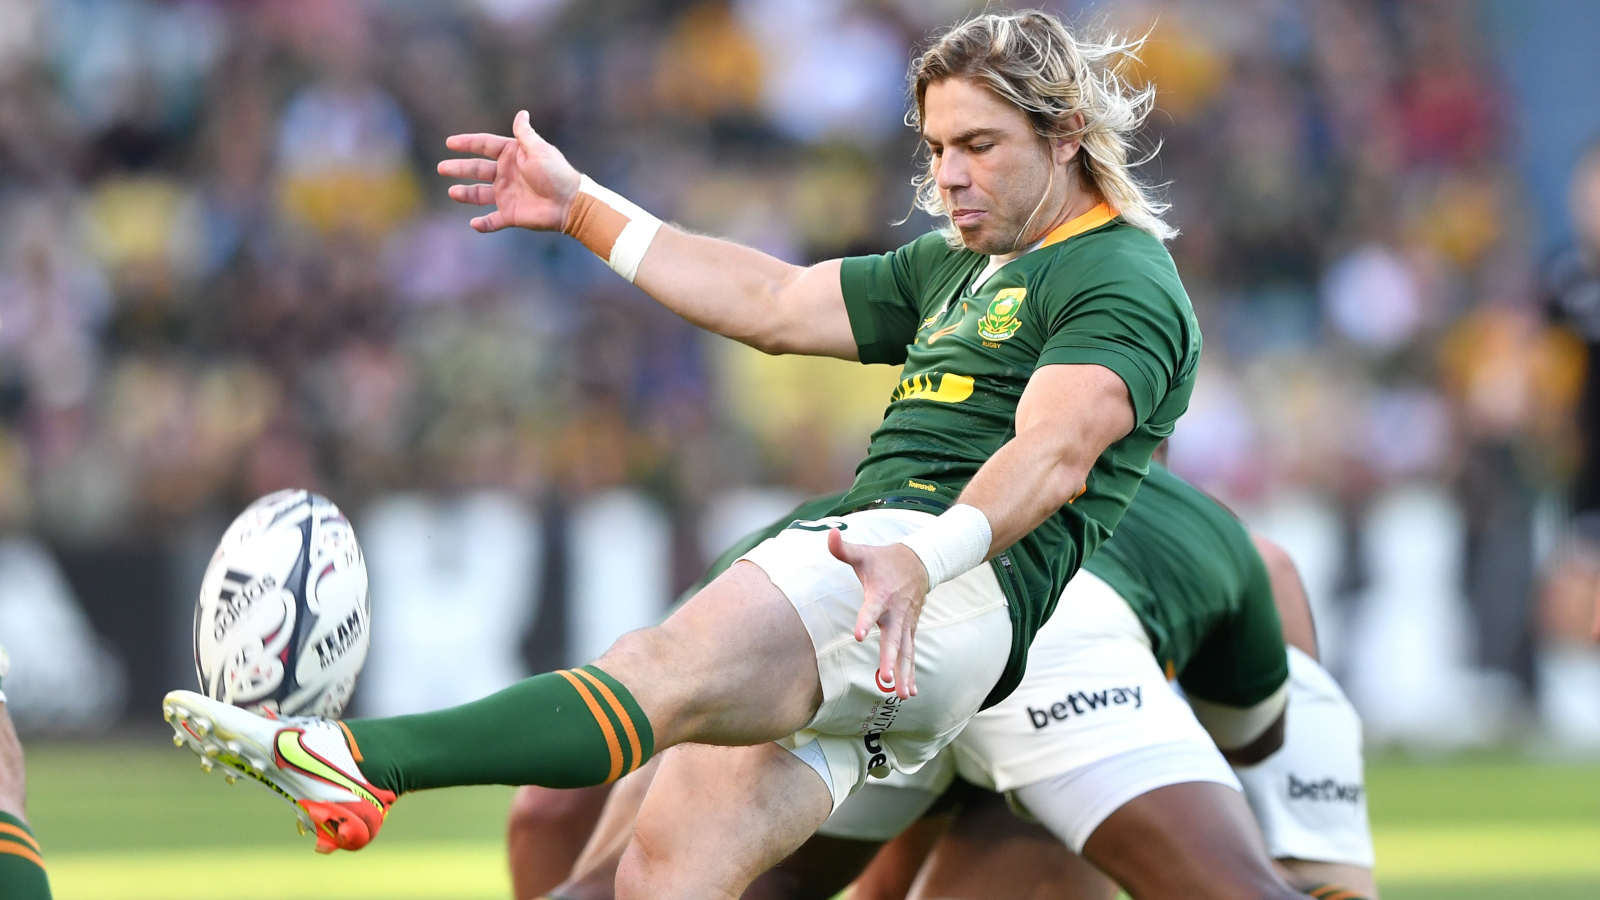

In [4]:
im = Image.open(r"C:\Users\Usuario\Faf-de-Klerk-for-South-Africa-in-2021-PA-1.jpg")
im

In [5]:
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")



The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a Ber

In [6]:
inputs = processor(images=im, return_tensors="pt")
outputs = model(**inputs)

In [7]:
# convert outputs (bounding boxes and class logits) to COCO API
# let's only keep detections with score > 0.9
target_sizes = torch.tensor([im.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

In [20]:
results["labels"][0]

tensor(37)

Detected sports ball with confidence 0.994 at location [190.14, 492.47, 371.33, 724.78]
Detected person with confidence 0.999 at location [152.65, 8.24, 1367.87, 890.68]
Detected person with confidence 0.958 at location [502.56, 506.99, 1375.6, 894.11]


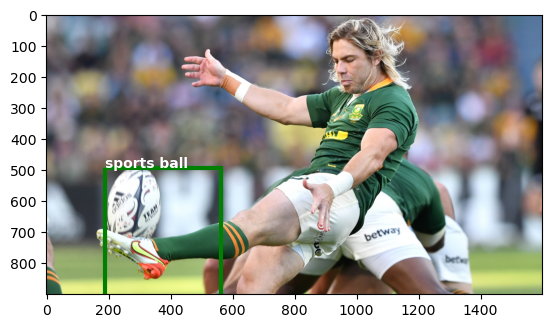

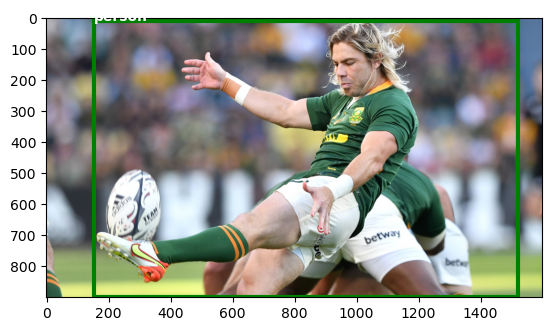

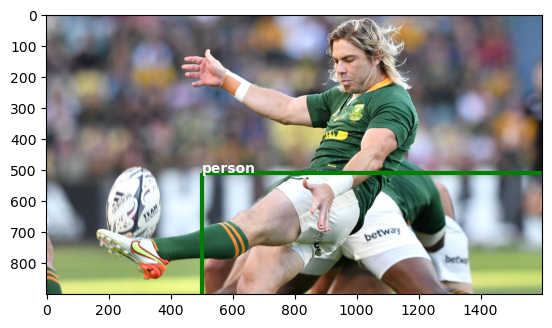

In [14]:
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    
    fig, ax = plt.subplots()
    plt.imshow(im)
    ax.add_patch(Rectangle((box[0],box[1]),box[2],box[3],edgecolor='green',fill=False,lw=3))
    ax.annotate(f"{model.config.id2label[label.item()]}",(box[0],box[1]),color='white',weight='bold')
    
    print(
            f"Detected {model.config.id2label[label.item()]} with confidence "
            f"{round(score.item(), 3)} at location {box}"
    )
#plt.show()

In [7]:
ffmpeg_extract_subclip("video1.mp4", t1=19, t2=83, targetname="test.mp4")
clip = VideoFileClip("test.mp4")

Moviepy - Running:
>>> "+ " ".join(cmd)
Moviepy - Command successful


In [8]:
clip.preview(fps = 20) 

In [15]:
capture = cv2.VideoCapture(r"C:\Users\Usuario\test.mp4")

In [16]:
frameNr = 0
while (True):
 
    success, frame = capture.read()
 
    if success:
        cv2.imwrite(f"C:/Users/Usuario/VideoCapture/frame_{frameNr}.jpg", frame)
 
    else:
        break
 
    frameNr = frameNr+1
 
capture.release()

In [17]:
frameNr

1601

In [ ]:
capture = cv2.VideoCapture(r"C:\Users\Usuario\test.mp4")
 
frameNr = 0
 
with handsModule.Hands() as hands:
 
    while (True):
 
        success, frame = capture.read()
 
        if not success:
            break
 
        results = hands.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
 
        if results.multi_hand_landmarks != None:
            for handLandmarks in results.multi_hand_landmarks:
                drawingModule.draw_landmarks(frame, handLandmarks, handsModule.HAND_CONNECTIONS)
 
        cv2.imwrite(f'C:/Users/N/Desktop/output/frame_{frameNr}.jpg', frame)
 
        frameNr = frameNr+1
 
capture.release()